In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras 

In [25]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/uninstall.py", line 86, in run
    auto_confirm=options.yes, verbose=self.verbosity > 0,
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/req/req_install.py", line 658, in uninstall
    uninstalled_pathset.remove(auto_confirm, 

In [27]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.0


In [28]:
!pip install tensorflow==2.0.0-beta1

ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0-beta1 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0rc0, 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3, 2.4.0rc4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0rc0, 2.5.0rc1, 2.5.0rc2, 2.5.0rc3, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.8.0rc0, 2.8.0rc1, 2.8.0)
ERROR: No matching distribution found for tensorflow==2.0.0-beta1


In [1]:
!pip install tensorflow==2.0.0

In [3]:
mnist = keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [4]:
unique_labels = np.unique(train_labels)
unique_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

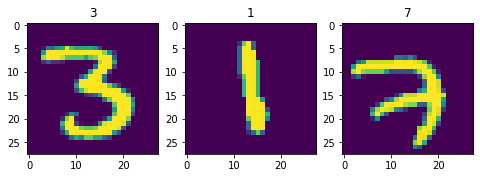

In [6]:
plt.figure(figsize = (8,5))
plt.subplot(1,3,1)
plt.imshow(train_images[12])
plt.title(train_labels[12])

plt.subplot(1,3,2)
plt.imshow(train_images[200])
plt.title(train_labels[200])

plt.subplot(1,3,3)
plt.imshow(train_images[5000])
plt.title(train_labels[5000])

plt.show()

scaling the images by dividing by 255 (pixel ranges 0-255)

In [7]:
train_images = train_images/255.0
test_images = test_images/255.0

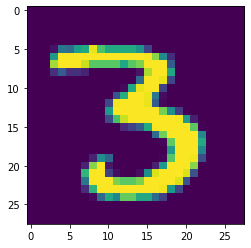

In [8]:
plt.imshow(train_images[12])
plt.show()

In [9]:
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]

In [10]:
dim = np.prod(train_images.shape[1:])

x_train = x_train.reshape(x_train.shape[0],dim)
x_val = x_val.reshape(x_val.shape[0],dim)
test_images = test_images.reshape(test_images.shape[0],dim)

In [11]:
from tensorflow.keras.utils import to_categorical

labels = 10
y_train = to_categorical(y_train,labels)
y_val = to_categorical(y_val,labels)
test_labels = to_categorical(test_labels,labels)

In [15]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
X = tf.placeholder(shape=[None, dim], dtype=tf.float32)
Y = tf.placeholder(shape = [None,labels],dtype=tf.float32)

In [23]:
# model architecture

def multilayer_perceptron(x,no_classes,first_layer_neurons = 255,second_layer_neurons = 128):
  # first layer
  first_weight = tf.Variable(tf.random_uniform([dim, first_layer_neurons]))
  first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
  first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))

  # second layer
  second_weight = tf.Variable(tf.random_uniform([first_layer_neurons,second_layer_neurons]))
  second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
  second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), 
                                          second_bias))
  
  # output layer 
  final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
  final_bias = tf.Variable(tf.zeros([no_classes]))
  logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)

  return logits

In [24]:
logits = multilayer_perceptron(X,labels)

In [25]:
learning_rate = 0.01
# we define the loss and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [26]:
# initialise the variables
init = tf.global_variables_initializer()

In [27]:
epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size

In [28]:
#train model
with tf.Session() as session:
  session.run(init)
  for epoch in range(epochs):
    average_cost = 0
    start, end = 0, batch_size

    for i in range(iteration):
      batch_x, batch_y = x_train[start: end], y_train[start: end]
      _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
      start += batch_size
      end += batch_size 
      #average loss
      average_cost += loss/iteration
    print("Epoch========{}".format(epoch))
    
  #evaluate model
  prediction = tf.nn.softmax(logits)
  ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
  accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
  print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: test_labels})))

Epoch========0
Epoch========1
Epoch========2
Epoch========3
Epoch========4
Epoch========5
Epoch========6
Epoch========7
Epoch========8
Epoch========9
Epoch========10
Epoch========11
Epoch========12
Epoch========13
Epoch========14
Epoch========15
Epoch========16
Epoch========17
Epoch========18
Epoch========19
Accuracy: 0.8973000049591064


Optimization of neural networks 

In [31]:
# Building a Sequential Feed Forward Network in Keras

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(dim,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(labels, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))



Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 33us/sample - loss: 0.6628 - acc: 0.8196 - val_loss: 0.2591 - val_acc: 0.9264
Epoch 2/20
50000/50000 [==============================] - 2s 32us/sample - loss: 0.2348 - acc: 0.9327 - val_loss: 0.1876 - val_acc: 0.9472
Epoch 3/20
50000/50000 [==============================] - 2s 31us/sample - loss: 0.1769 - acc: 0.9488 - val_loss: 0.1545 - val_acc: 0.9579
Epoch 4/20
50000/50000 [==============================] - 2s 31us/sample - loss: 0.1383 - acc: 0.9598 - val_loss: 0.1315 - val_acc: 0.9631
Epoch 5/20
50000/50000 [==============================] - 2s 32us/sample - loss: 0.1147 - acc: 0.9665 - val_loss: 0.1201 - val_acc: 0.9651
Epoch 6/20
50000/50000 [==============================] - 2s 32us/sample - loss: 0.0936 - acc: 0.9734 - val_loss: 0.1054 - val_acc: 0.9688
Epoch 7/20
50000/50000 [==============================] - 2s 33us/sample - loss: 0.0806 - acc: 0.9766 - val_loss: 0.

Text(0.5, 1.0, 'Loss Curves - before regularisation')

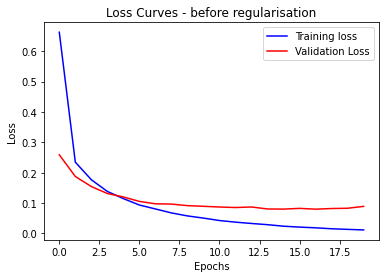

In [32]:
#Check for Overfitting

plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - before regularisation')

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 40us/sample - loss: 1.0095 - acc: 0.6753 - val_loss: 0.2945 - val_acc: 0.9149
Epoch 2/20
50000/50000 [==============================] - 2s 37us/sample - loss: 0.3737 - acc: 0.8889 - val_loss: 0.2009 - val_acc: 0.9427
Epoch 3/20
50000/50000 [==============================] - 2s 37us/sample - loss: 0.2822 - acc: 0.9176 - val_loss: 0.1580 - val_acc: 0.9550
Epoch 4/20
50000/50000 [==============================] - 2s 38us/sample - loss: 0.2308 - acc: 0.9315 - val_loss: 0.1369 - val_acc: 0.9606
Epoch 5/20
50000/50000 [==============================] - 2s 37us/sample - loss: 0.1990 - acc: 0.9414 - val_loss: 0.1225 - val_acc: 0.9647
Epoch 6/20
50000/50000 [==============================] - 2s 37us/sample - loss: 0.1745 - acc: 0.9486 - val_loss: 0.1096 - val_acc: 0.9687
Epoch 7/20
50000/50000 [==============================] - 2s 48us/sample - loss: 0.1568 - acc: 0.9540 - val_loss: 0.

Text(0.5, 1.0, 'Loss Curves - after regularisation')

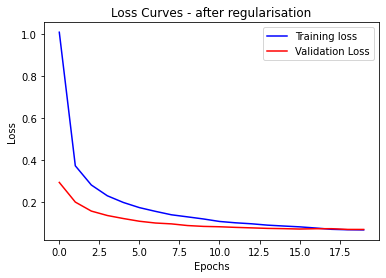

In [36]:
#Although the validation and training loss seem great, we can see that the validation #loss increases. This identifies overfitting in our network. How do we proceed? #Introduce regularisation to the model.

from tensorflow.keras.layers import Dropout
reg_model = Sequential()
reg_model.add(Dense(256, activation='relu', input_shape=(dim,)))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation='relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(labels, activation='softmax'))

reg_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

reg_history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val), 
                            epochs=20, batch_size=1000)
test_loss, test_accuracy = reg_model.evaluate(test_images, test_labels)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

test_loss, test_accuracy = reg_model.evaluate(test_images, test_labels)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - after regularisation')